In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools
import seaborn

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [62]:
df = pd.read_csv("car_data.csv")

In [63]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [64]:
mileage = df[['Mileage']]
price = df[['Price']]

In [65]:
linreg = linear_model.LinearRegression()
linreg.fit(mileage, price)
# print intercept and coefficients
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

# calculate the R-squared
print('R-squared:', linreg.score(mileage, price))

Intercept: [ 24764.55900606]
Coefficient: [[-0.1725205]]
R-squared: 0.0204634473235


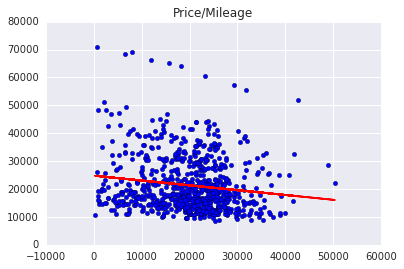

In [66]:
plt.scatter(mileage, price)
plt.plot(mileage, linreg.predict(mileage), c='r')
plt.title('Price/Mileage')
plt.show()

In [67]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', linear_model.LinearRegression(fit_intercept=False))])

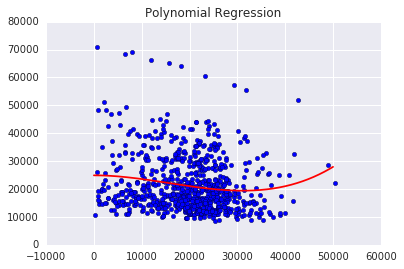

In [68]:
model.fit(mileage, price)
plt.scatter(mileage, price)
plt.plot(model.predict([[j] for j in range(50000)]), c='r')
plt.title('Polynomial Regression')
plt.show()

In [69]:
model.score(mileage, price)

0.027121896019919101

### Notes
With R^2 scores of around .02 for both a normal linear regression and polynomial regression (best fit around 3 degrees), it seems like mileage compared to price is not an ideal tool.  

## Part 2

In [70]:
stat_list = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
stats = df[stat_list]
price = df[['Price']]

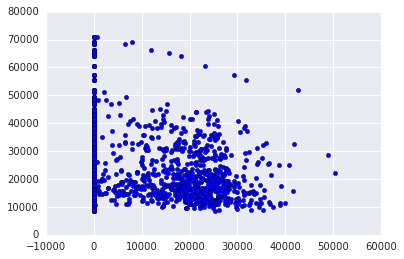

In [71]:
fig, ax = plt.subplots()
for stat in stat_list:
    ax.scatter(df[[stat]], price)
plt.show()

In [60]:
combinations = []
for x in range(1, 8):
    combinations.append(itertools.combinations(stat_list, x))
    
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        plinreg = linear_model.LinearRegression()
        plinreg.fit(x, price)
        if best_score < plinreg.score(x, price):
            best_score = plinreg.score(x, price)
            max_group = group
print(max_group, best_score)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.446264353673
